# Preparation

## Imports

In [1]:
# Data handling
import pandas as pd
import numpy as np
# Plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
# Statistical analyses
import itertools
from scipy.stats import norm, truncnorm, gaussian_kde
from scipy.stats import ks_2samp, pearsonr
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statistics import NormalDist
# IO
import sys

## Paths

In [2]:
# Base path for functions
base_path = "C:/repos/"
sys.path.append(base_path)

# Path to find run results
results_path = base_path + "twrds_unbiased_anns/runs/results/"

# Path to store figures
figure_path = base_path + "twrds_unbiased_anns/figures/results/classification/"

## Functions

In [3]:
# Data
from twrds_unbiased_anns.src.analysis.data import load_run_data
# Plotting

# Analysis of Experiment 3

## Parameters

In [4]:
# Run specific
run_name = "classification_all"
run_date = "13-05-2021"

## Data Loading

In [5]:
df = load_run_data(run_name, run_date, results_path)
df.head(5)

,Unnamed: 0,run,date,model,loss,category,m_diff,stddev,minority_share,repeat,threshold,noise,shape_color,shape_type,size,actual,prediction,group,prediction_diff,rmse
0,0,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,0,3,5,1,60,0,white,square,116,1,1.000000,over,0.000000,0.000000
1,1,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,0,3,5,1,60,0,white,square,55,0,0.000027,over,0.000027,0.000027
2,2,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,0,3,5,1,60,0,white,square,46,0,0.000062,over,0.000062,0.000062
3,3,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,0,3,5,1,60,0,white,square,53,0,0.000033,over,0.000033,0.000033
4,4,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,0,3,5,1,60,0,white,square,99,1,1.000000,over,0.000000,0.000000


In [6]:
# Add column with binary prediction
df["prediction_bin"] = df["prediction"] >= 0.5

# Add columns for true positive, false positive, true negative, false negative
conditions = [
    (df['actual'] == 1) & (df['prediction_bin'] == 1),
    (df['actual'] == 0) & (df['prediction_bin'] == 1),
    (df['actual'] == 0) & (df['prediction_bin'] == 0),
    (df['actual'] == 1) & (df['prediction_bin'] == 0)
]

# Create a list of the values we want to assign for each condition
values = ['tp', 'fp', 'tn', 'fn']

# Create a new column and use np.select to assign values to it using our lists as arguments
df['result'] = np.select(conditions, values)


# Add other data to dataframe
df["mean_red"] = 100 - df["m_diff"]

# Split dataframe by groups for later analyses
df_over = df[df.group == "over"]
df_under = df[df.group == "under"]

df

,Unnamed: 0,run,date,model,loss,category,m_diff,stddev,minority_share,repeat,...,shape_type,size,actual,prediction,group,prediction_diff,rmse,prediction_bin,result,mean_red
0,0,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,0,3,5,1,...,square,116,1,1.000000,over,0.000000,0.000000,True,tp,100
1,1,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,0,3,5,1,...,square,55,0,0.000027,over,0.000027,0.000027,False,tn,100
2,2,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,0,3,5,1,...,square,46,0,0.000062,over,0.000062,0.000062,False,tn,100
3,3,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,0,3,5,1,...,square,53,0,0.000033,over,0.000033,0.000033,False,tn,100
4,4,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,0,3,5,1,...,square,99,1,1.000000,over,0.000000,0.000000,True,tp,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,449995,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,50,30,50,5,...,circle,41,0,0.000075,under,0.000075,0.000075,False,tn,50
449996,449996,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,50,30,50,5,...,circle,98,1,0.995452,under,-0.004548,0.004548,True,tp,50
449997,449997,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,50,30,50,5,...,circle,79,0,0.000346,under,0.000346,0.000346,False,tn,50
449998,449998,classification_all,2021-05-13 08:49:03.584,SmallCNN,bce,color,50,30,50,5,...,circle,87,0,0.016659,under,0.016659,0.016659,False,tn,50


In [7]:
def get_results(data):
    total = len(data)
    tp = len(data[data.result == "tp"])
    fp = len(data[data.result == "fp"])
    tn = len(data[data.result == "tn"])
    fn = len(data[data.result == "fn"])
    p = tp + fn
    n = tn + fp
    accuracy = (tp + tn) / total
    tpr = tp / p
    tnr = tn / n
    return total, accuracy, tpr, tnr

results = []

# Group data
predictors = ["stddev", "minority_share", "mean_red", "threshold", "repeat"]
grouped = df.groupby(predictors)

# Go through groups
for stddev, minority_share, mean_red, threshold, repeat in grouped.groups.keys():
    
    # Get data
    data = grouped.get_group((stddev, minority_share, mean_red, threshold, repeat))
    
    # Overall data
    total, accuracy, tpr, tnr = get_results(data)
    
    # White shapes
    total_w, accuracy_w, tpr_w, tnr_w = get_results(data[data.group == "over"])
    
    # Red shapes
    total_r, accuracy_r, tpr_r, tnr_r = get_results(data[data.group == "under"])
        
    # Store data
    results.append(
        {
            "stddev": stddev,
            "minority_share": minority_share,
            "m_diff": 100 - mean_red,
            "mean_red": mean_red,
            "threshold": threshold,
            "repeat": repeat,
            "total": total,
            "accuracy": accuracy,
            "tpr": tpr,
            "tnr": tnr,
            "accuracy_w": accuracy_w,
            "tpr_w": tpr_w,
            "tnr_w": tnr_w,
            "accuracy_r": accuracy_r,
            "tpr_r": tpr_r,
            "tnr_r": tnr_r,
            "accuracy_diff": accuracy_w - accuracy_r,
            "tpr_diff": tpr_w - tpr_r,
            "tnr_diff": tnr_w - tnr_r
        }
    )
    
# Make dataframe of results
df_results = pd.DataFrame(results)
df_results

,stddev,minority_share,m_diff,mean_red,threshold,repeat,total,accuracy,tpr,tnr,accuracy_w,tpr_w,tnr_w,accuracy_r,tpr_r,tnr_r,accuracy_diff,tpr_diff,tnr_diff
0,3,5,50,50,60,1,500,0.548,0.350575,1.000000,0.792,0.701149,1.000000,0.304,0.000000,1.0,0.488,0.701149,0.000000
1,3,5,50,50,60,2,500,0.548,0.350575,1.000000,0.792,0.701149,1.000000,0.304,0.000000,1.0,0.488,0.701149,0.000000
2,3,5,50,50,60,3,500,0.792,0.701149,1.000000,0.796,0.706897,1.000000,0.788,0.695402,1.0,0.008,0.011494,0.000000
3,3,5,50,50,60,4,500,0.782,0.686782,1.000000,0.792,0.701149,1.000000,0.772,0.672414,1.0,0.020,0.028736,0.000000
4,3,5,50,50,60,5,500,0.780,0.683908,1.000000,0.796,0.706897,1.000000,0.764,0.660920,1.0,0.032,0.045977,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,30,50,0,100,90,1,500,0.902,1.000000,0.860795,0.804,1.000000,0.721591,1.000,1.000000,1.0,-0.196,0.000000,-0.278409
896,30,50,0,100,90,2,500,0.904,1.000000,0.863636,0.808,1.000000,0.727273,1.000,1.000000,1.0,-0.192,0.000000,-0.272727
897,30,50,0,100,90,3,500,0.904,1.000000,0.863636,0.808,1.000000,0.727273,1.000,1.000000,1.0,-0.192,0.000000,-0.272727
898,30,50,0,100,90,4,500,0.912,1.000000,0.875000,0.824,1.000000,0.750000,1.000,1.000000,1.0,-0.176,0.000000,-0.250000


In [8]:
header = """
% Results of 3rd experiment
\\renewcommand{\\arraystretch}{1}
\\begin{table}[h!]
\\centering
\\renewcommand*\TPTnoteLabel[1]{\\parbox[b]{3em}{\\hfill#1\\,}}
\\begin{threeparttable}
\\begin{tabular*}{\\textwidth}{S[table-format=2.0]S[table-format=2.0]S[table-format=3.0]S[table-format=2.0] @{\\extracolsep{\\fill}} S[table-format=3.2]S[table-format=3.2]S[table-format=3.2]S[table-format=3.2]S[table-format=3.2]S[table-format=3.2] @{\\extracolsep{\\fill}}}
\\toprule
&&&& \\multicolumn{3}{c}{White Shapes (\\%)} & \\multicolumn{3}{c}{Red Shapes (\\%)}  \\\\
\\cmidrule(l{2pt}r{2pt}){5-7}
\\cmidrule(l{2pt}r{2pt}){8-10}
{$\\sigma$} & {$\\mathrm{\\%}_{\\mathrm{red}}$} & {$\\mu$} & {$\\theta$} & {Accuracy} & {TPR} & {TNR} & {Accuracy} & {TPR} & {TNR} \\\\ \\midrule
"""

footer_1 = """
\\bottomrule
\\end{tabular*}
"""

footer_2 = """
\\end{threeparttable}
\\end{table}
"""
def print_data(data):
    for index, row in data.sort_values(by = ["minority_share", "mean_red", "threshold"]).iterrows():
        stddev = row["stddev"]
        minority_share = row["minority_share"]
        m_red = row["mean_red"]
        threshold = row["threshold"]
        accuracy_w = row["accuracy_w"].round(4) * 100
        accuracy_r = row["accuracy_r"].round(4) * 100
        tpr_w = row["tpr_w"].round(4) * 100
        tpr_r = row["tpr_r"].round(4) * 100
        tnr_w = row["tnr_w"].round(4) * 100
        tnr_r = row["tnr_r"].round(4) * 100      
        row_text = "{:.0f} & {:.0f} & {:.0f} & {:.0f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(stddev, minority_share, m_red, threshold, accuracy_w, tpr_w, tnr_w, accuracy_r, tpr_r, tnr_r)
        print(row_text)
        
def print_to_latex(data):
    # Iterate through all standard deviations
    for std in data.stddev.unique():        
        # Header
        print(header)        
        # Data
        print_data(data[data.stddev == std])
        # Footer with caption and label
        caption = "\\caption{Results of experiment 3 for standard deviation $\\sigma =" + str(std) + "$.}"
        label = "\n\\label{table:results_exp_3_std_" + str(std) + "}"    
        print(footer_1+caption+label+footer_2)        

In [9]:
print_to_latex(df_results)


% Results of 3rd experiment
\renewcommand{\arraystretch}{1}
\begin{table}[h!]
\centering
\renewcommand*\TPTnoteLabel[1]{\parbox[b]{3em}{\hfill#1\,}}
\begin{threeparttable}
\begin{tabular*}{\textwidth}{S[table-format=2.0]S[table-format=2.0]S[table-format=3.0]S[table-format=2.0] @{\extracolsep{\fill}} S[table-format=3.2]S[table-format=3.2]S[table-format=3.2]S[table-format=3.2]S[table-format=3.2]S[table-format=3.2] @{\extracolsep{\fill}}}
\toprule
&&&& \multicolumn{3}{c}{White Shapes (\%)} & \multicolumn{3}{c}{Red Shapes (\%)}  \\
\cmidrule(l{2pt}r{2pt}){5-7}
\cmidrule(l{2pt}r{2pt}){8-10}
{$\sigma$} & {$\mathrm{\%}_{\mathrm{red}}$} & {$\mu$} & {$\theta$} & {Accuracy} & {TPR} & {TNR} & {Accuracy} & {TPR} & {TNR} \\ \midrule

3 & 5 & 50 & 60 & 79.36 & 70.34 & 100.00 & 58.64 & 40.57 & 100.00 \\
3 & 5 & 50 & 75 & 100.00 & 100.00 & 100.00 & 85.76 & 71.29 & 100.00 \\
3 & 5 & 50 & 90 & 80.00 & 100.00 & 71.59 & 82.56 & 97.30 & 76.36 \\
3 & 5 & 70 & 60 & 80.16 & 71.49 & 100.00 & 69.60 & 100.00 & 

### Find largest bias with equal groups

In [10]:
df_results[df_results.minority_share == 50].sort_values(by = "accuracy_diff", ascending = False).head(5)

,stddev,minority_share,m_diff,mean_red,threshold,total,accuracy,tpr,tnr,accuracy_w,tpr_w,tnr_w,accuracy_r,tpr_r,tnr_r,accuracy_diff,tpr_diff,tnr_diff
28,3,50,50,50,75,2500,0.7668,0.539516,0.990476,0.9824,0.983871,0.980952,0.5512,0.095161,1.000000,0.4312,0.888710,-0.019048
27,3,50,50,50,60,2500,0.5940,0.416667,1.000000,0.7928,0.702299,1.000000,0.3952,0.131034,1.000000,0.3976,0.571264,0.000000
64,5,50,50,50,75,2500,0.8268,0.650806,1.000000,0.9912,0.982258,1.000000,0.6624,0.319355,1.000000,0.3288,0.662903,0.000000
35,3,50,0,100,90,2500,0.7076,1.000000,0.584659,0.8080,1.000000,0.727273,0.6072,1.000000,0.442045,0.2008,0.000000,0.285227
34,3,50,0,100,75,2500,0.8896,0.996774,0.784127,0.9880,1.000000,0.976190,0.7912,0.993548,0.592063,0.1968,0.006452,0.384127


In [9]:
def convert_val_for_table(v):
    # Check if value is zero
    if v == 0.0:
        return "{:.4f}".format(v)
    # Check if value would be converted to exponent notation
    if v >= 0.0001 or v <= -0.0001:
        return "{:.4f}".format(v)
    else:
        # Convert to times notation
        v_str = str(v)
        [pre, exp] = v_str.split('e')
        return "{:.2f}e{}".format(float(pre), exp) 
    
def get_significance_string_latex(p_val, alpha_levels = [0.05, 0.01, 0.001, 0.0001]):
  if p_val <= alpha_levels[-1]:
    return "\\tnote{ ****}"
  elif p_val <= alpha_levels[-2]:
    return "\\tnote{ ***}"
  elif p_val <= alpha_levels[-3]:
    return "\\tnote{ **}"
  elif p_val <= alpha_levels[-4]:
    return "\\tnote{ *}"
  else:
    return "" 

## OLS Analysis

### Without threshold filtering

In [10]:
predictors = ["stddev", "mean_red", "minority_share", "threshold"]

# Initialize all combinations for OLS regression to test for interactions
ols_predictors = ""
for predictor in predictors:
    ols_predictors = ols_predictors + predictor + " + " 
ols_predictors = ols_predictors + "stddev * mean_red * minority_share * threshold"

# Define targets
targets = ["accuracy_diff", "tpr_diff", "tnr_diff"]

# Create empty dataframe for OLS results
ols_df = pd.DataFrame()

for target in targets:
    model = ols('{} ~ {}'.format(target, ols_predictors), df_results).fit()
    ols_df["{}_coef".format(target)] = model.params
    ols_df["{}_t".format(target)] = model.tvalues
    ols_df["{}_p".format(target)] = model.pvalues

ols_df

,accuracy_diff_coef,accuracy_diff_t,accuracy_diff_p,tpr_diff_coef,tpr_diff_t,tpr_diff_p,tnr_diff_coef,tnr_diff_t,tnr_diff_p
Intercept,4.471534e-01,1.456313,0.145661,-1.077645e+00,-1.836256,0.066655,1.459044e+00,3.288766,0.001046
stddev,-5.328482e-02,-2.938944,0.003379,-1.049745e-01,-3.029221,0.002523,-2.218847e-02,-0.846996,0.397227
mean_red,-3.559313e-03,-0.882833,0.377567,4.300159e-03,0.558028,0.576967,-7.222179e-03,-1.239786,0.215383
minority_share,-8.445853e-03,-0.816566,0.414396,-4.519377e-02,-2.286049,0.022487,-1.557616e-02,-1.042256,0.297578
threshold,-2.224124e-03,-0.550469,0.582137,2.353182e-02,3.047116,0.002379,-1.881463e-02,-3.222821,0.001316
stddev:mean_red,5.266837e-04,2.212339,0.027198,1.146202e-03,2.518965,0.011945,2.506329e-04,0.728629,0.466422
stddev:minority_share,6.346817e-04,1.039186,0.299002,4.137362e-03,3.544216,0.000414,-3.609239e-04,-0.408996,0.682641
mean_red:minority_share,1.013861e-04,0.746518,0.455553,4.343934e-04,1.673417,0.094599,3.838014e-04,1.955846,0.050798
stddev:mean_red:minority_share,-7.088144e-06,-0.883861,0.377012,-4.425521e-05,-2.887188,0.003982,-1.462902e-06,-0.126250,0.899562
stddev:threshold,5.717330e-04,2.396388,0.016764,1.240379e-03,2.720054,0.006655,2.307578e-04,0.669401,0.503414


In [11]:
def replace_regressors(r):
    r = r.replace("Intercept", "Constant")
    r = r.replace("threshold", "$\\theta$")
    r = r.replace("stddev", "$\\sigma$")
    r = r.replace("mean_red", "$\\mu_\\mathrm{red}$")
    r = r.replace("minority_share", "$\\%_\\mathrm{red}$")
    r = r.replace(":", " $\\times$ ")
    return r   

In [27]:
for index, row in ols_df.iterrows():
    regressors = replace_regressors(index)
    accuracy = convert_val_for_table(row["accuracy_diff_coef"]) + get_significance_string_latex(row["accuracy_diff_p"])
    tpr = convert_val_for_table(row["tpr_diff_coef"]) + get_significance_string_latex(row["tpr_diff_p"])
    tnr = convert_val_for_table(row["tnr_diff_coef"]) + get_significance_string_latex(row["tnr_diff_p"])     
    print("{} & {} & {} & {} \\\\".format(regressors, accuracy, tpr, tnr))

Constant & 0.4472 & -1.0776 & 1.4590\tnote{ **} \\
$\sigma$ & -0.0533\tnote{ **} & -0.1050\tnote{ **} & -0.0222 \\
$\mu_\mathrm{red}$ & -0.0036 & 0.0043 & -0.0072 \\
$\%_\mathrm{red}$ & -0.0084 & -0.0452\tnote{ *} & -0.0156 \\
$\theta$ & -0.0022 & 0.0235\tnote{ **} & -0.0188\tnote{ **} \\
$\sigma$ $\times$ $\mu_\mathrm{red}$ & 0.0005\tnote{ *} & 0.0011\tnote{ *} & 0.0003 \\
$\sigma$ $\times$ $\%_\mathrm{red}$ & 0.0006 & 0.0041\tnote{ ***} & -0.0004 \\
$\mu_\mathrm{red}$ $\times$ $\%_\mathrm{red}$ & 0.0001 & 0.0004 & 0.0004 \\
$\sigma$ $\times$ $\mu_\mathrm{red}$ $\times$ $\%_\mathrm{red}$ & -7.09e-06 & -4.43e-05\tnote{ **} & -1.46e-06 \\
$\sigma$ $\times$ $\theta$ & 0.0006\tnote{ *} & 0.0012\tnote{ **} & 0.0002 \\
$\mu_\mathrm{red}$ $\times$ $\theta$ & 1.02e-05 & -0.0001 & 9.27e-05 \\
$\sigma$ $\times$ $\mu_\mathrm{red}$ $\times$ $\theta$ & -6.21e-06\tnote{ *} & -1.46e-05\tnote{ *} & -3.03e-06 \\
$\%_\mathrm{red}$ $\times$ $\theta$ & 0.0001 & 0.0007\tnote{ **} & 0.0001 \\
$\sigma$ $\ti

### With threshold filtering

In [12]:
predictors = ["stddev", "mean_red", "minority_share"]

# Initialize all combinations for OLS regression to test for interactions
ols_predictors = ""
for predictor in predictors:
    ols_predictors = ols_predictors + predictor + " + " 
ols_predictors = ols_predictors + "stddev * mean_red * minority_share"

# Define targets
targets = ["accuracy_diff", "tpr_diff", "tnr_diff"]

# Create empty dataframe for OLS results
ols_df_total = pd.DataFrame()

for threshold in [60, 75, 90]:
    ols_df = pd.DataFrame()    
    for target in targets:        
        model = ols('{} ~ {}'.format(target, ols_predictors), df_results[df_results.threshold == threshold]).fit()      
        ols_df["{}_coef".format(target)] = model.params
        ols_df["{}_t".format(target)] = model.tvalues
        ols_df["{}_p".format(target)] = model.pvalues
        ols_df["threshold"] = [threshold]*8    
    ols_df_total = pd.concat([ols_df_total, ols_df])

ols_df_total

,accuracy_diff_coef,accuracy_diff_t,accuracy_diff_p,threshold,tpr_diff_coef,tpr_diff_t,tpr_diff_p,tnr_diff_coef,tnr_diff_t,tnr_diff_p
Intercept,1.638444e-01,2.204737,2.825215e-02,60,0.071369,0.610020,5.423229e-01,3.755653e-01,2.045256,0.041726
stddev,-1.362133e-02,-3.104090,2.095847e-03,60,-0.014582,-2.110758,3.564317e-02,-1.142229e-02,-1.053428,0.293016
mean_red,-1.459341e-03,-1.495533,1.358553e-01,60,-0.001159,-0.754314,4.512687e-01,-2.147466e-03,-0.890641,0.373855
minority_share,-1.522350e-03,-0.608120,5.435807e-01,60,0.002669,0.677187,4.988236e-01,-1.111796e-02,-1.797368,0.073310
stddev:mean_red,7.815338e-05,1.356365,1.760309e-01,60,0.000073,0.801482,4.235046e-01,9.063148e-05,0.636568,0.524905
stddev:minority_share,-5.395007e-05,-0.364969,7.153985e-01,60,-0.000139,-0.596344,5.514072e-01,1.402618e-04,0.384008,0.701252
mean_red:minority_share,2.388226e-05,0.726548,4.680850e-01,60,-0.000054,-1.047470,2.957491e-01,2.026616e-04,2.495153,0.013142
stddev:mean_red:minority_share,8.045929e-08,0.041453,9.669632e-01,60,0.000002,0.614204,5.395589e-01,-4.032262e-06,-0.840745,0.401179
Intercept,5.800673e-01,7.013173,1.623791e-11,75,1.213033,8.161699,9.967704e-15,-4.285106e-02,-0.622389,0.534172
stddev,-2.112387e-02,-4.325130,2.094811e-05,75,-0.043886,-5.000616,9.876158e-07,1.276954e-03,0.314098,0.753671


In [13]:
prev_thresh = None
for index, row in ols_df_total.iterrows():
    threshold = row["threshold"]
    regressors = replace_regressors(index)
    accuracy = convert_val_for_table(row["accuracy_diff_coef"]) + get_significance_string_latex(row["accuracy_diff_p"])
    tpr = convert_val_for_table(row["tpr_diff_coef"]) + get_significance_string_latex(row["tpr_diff_p"])
    tnr = convert_val_for_table(row["tnr_diff_coef"]) + get_significance_string_latex(row["tnr_diff_p"])   
    if prev_thresh == threshold:       
        print(" & {} & {} & {} & {} \\\\".format(regressors, accuracy, tpr, tnr))
    else:
        print("{} & {} & {} & {} & {} \\\\".format(threshold, regressors, accuracy, tpr, tnr))
    prev_thresh = threshold

60.0 & Constant & 0.1638\tnote{ *} & 0.0714 & 0.3756\tnote{ *} \\
 & $\sigma$ & -0.0136\tnote{ **} & -0.0146\tnote{ *} & -0.0114 \\
 & $\mu_\mathrm{red}$ & -0.0015 & -0.0012 & -0.0021 \\
 & $\%_\mathrm{red}$ & -0.0015 & 0.0027 & -0.0111 \\
 & $\sigma$ $\times$ $\mu_\mathrm{red}$ & 7.82e-05 & 7.27e-05 & 9.06e-05 \\
 & $\sigma$ $\times$ $\%_\mathrm{red}$ & -5.40e-05 & -0.0001 & 0.0001 \\
 & $\mu_\mathrm{red}$ $\times$ $\%_\mathrm{red}$ & 2.39e-05 & -5.42e-05 & 0.0002\tnote{ *} \\
 & $\sigma$ $\times$ $\mu_\mathrm{red}$ $\times$ $\%_\mathrm{red}$ & 8.05e-08 & 1.88e-06 & -4.03e-06 \\
75.0 & Constant & 0.5801\tnote{ ****} & 1.2130\tnote{ ****} & -0.0429 \\
 & $\sigma$ & -0.0211\tnote{ ****} & -0.0439\tnote{ ****} & 0.0013 \\
 & $\mu_\mathrm{red}$ & -0.0058\tnote{ ****} & -0.0123\tnote{ ****} & 0.0007 \\
 & $\%_\mathrm{red}$ & -0.0026 & -0.0005 & -0.0046\tnote{ *} \\
 & $\sigma$ $\times$ $\mu_\mathrm{red}$ & 0.0002\tnote{ **} & 0.0004\tnote{ ***} & -2.01e-05 \\
 & $\sigma$ $\times$ $\%_\math

## Individual Plots

In [14]:
def plot_means(df, predictor, target, color, ax, ci = True):    
    # Get 95% confidence intervals of means
    stats = df.groupby([predictor])[target].agg(['mean', 'count', 'std'])
    ci95_hi = []
    ci95_lo = []
    for i in stats.index:
      m, c, s = stats.loc[i]
      ci95_hi.append(m + 1.95*s/np.sqrt(c))
      ci95_lo.append(m - 1.95*s/np.sqrt(c))
    stats['ci95_hi'] = ci95_hi
    stats['ci95_lo'] = ci95_lo
    stats['grp'] = stats.index
    # Plot confidence intervals
    if ci:
        for grp in stats.index:
            ax.vlines(x=grp, ymin=stats.loc[grp]['ci95_lo'], ymax=stats.loc[grp]['ci95_hi'], color = color)
    # Plot means
    ax.scatter(x=stats['grp'], y=stats['mean'], s = 10, color = color)
    
def plot_linear_ols(df, predictor, target, color, ax, line_x, label = None):
    # Fit OLS to each data group
    model = ols('{} ~ {}'.format(target, predictor), df).fit()
    # Plot OLS lines
    p = model.params
    line_y = p.Intercept + p[1] * line_x
    if label:
        ax.plot(line_x, line_y, color = color, label = label)
    else:
        ax.plot(line_x, line_y, color = color)
    
def plot_log_ols(df, predictor, target, color, ax, line_x, label = None):
    df["transformed_" + predictor] = np.log(df[predictor])
    # Fit OLS to each data group
    model = ols('{} ~ {}'.format(target, "transformed_" + predictor), df).fit()
    # Plot OLS lines
    p = model.params
    line_y = p.Intercept + p[1] * np.log(line_x)
    if label:
        ax.plot(line_x, line_y, color = color, label = label)
    else:
        ax.plot(line_x, line_y, color = color)
        
def plot_reciprocal_ols(df, predictor, target, color, ax, line_x, label = None):
    df["transformed_" + predictor] = 1 / df[predictor]
    # Fit OLS to each data group
    model = ols('{} ~ {}'.format(target, "transformed_" + predictor), df).fit()
    # Plot OLS lines
    p = model.params
    line_y = p.Intercept + p[1] * (1 / line_x)
    if label:
        ax.plot(line_x, line_y, color = color, label = label)
    else:
        ax.plot(line_x, line_y, color = color)
        
def plot_square_reciprocal_ols(df, predictor, target, color, ax, line_x, label = None):
    df["transformed_" + predictor] = 1 / np.square(df[predictor])
    # Fit OLS to each data group
    model = ols('{} ~ {}'.format(target, "transformed_" + predictor), df).fit()
    # Plot OLS lines
    p = model.params
    line_y = p.Intercept + p[1] * (1 / np.square(line_x))
    if label:
        ax.plot(line_x, line_y, color = color, label = label)
    else:
        ax.plot(line_x, line_y, color = color)

In [15]:
def plot_results(predictor, predictor_label, line_x, y_range, rel_type = "lin"):
    
    targets = ["Accuracy", "TPR", "TNR"]
    
    for target in targets:
        # Target title
        target_label = target
        target = target.lower()

        # Create plotting area
        fig = plt.plot(figsize=(10,3.75))
        ax = plt.gca()

        # Scatterplots
        plot_means(df_results, predictor, target + "_w", "lightgrey", ax)
        plot_means(df_results, predictor, target + "_r", "lightcoral", ax)

        # Curve fits for white shapes (linear)
        plot_linear_ols(df_results, predictor, target + "_w", "lightgrey", ax, line_x)
        
        # Curve fits for red shapes (dynamic)
        if rel_type == "lin":
            plot_linear_ols(df_results, predictor, target + "_r", "lightcoral", ax, line_x)
        if rel_type == "log":
            plot_log_ols(df_results, predictor, target + "_r", "lightcoral", ax, line_x)
        if rel_type == "reciproc":
            plot_reciprocal_ols(df_results, predictor, target + "_r", "lightcoral", ax, line_x)
        if rel_type == "sq_reciproc":
            plot_square_reciprocal_ols(df_results, predictor, target + "_r", "lightcoral", ax, line_x)
            
        # Axis labels
        ax.set_xlabel(predictor_label)
        ax.set_ylabel(target_label)

        # y-Axis range
        ax.set_ylim(y_range)

        # Save result
        plt.savefig(figure_path + predictor + "_" + target, dpi = 200, bbox_inches = 'tight')
        plt.show()

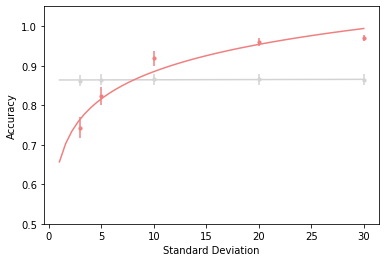

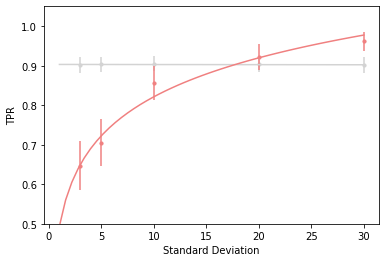

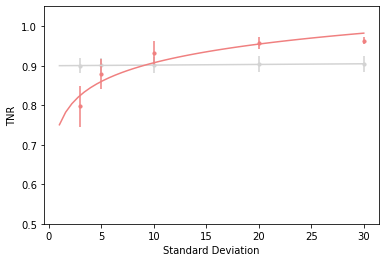

In [16]:
predictor = "stddev"
predictor_label = "Standard Deviation"
y_range = [0.5, 1.05]
line_x = np.linspace(1,30)

plot_results(predictor, predictor_label, line_x, y_range, rel_type = "log")

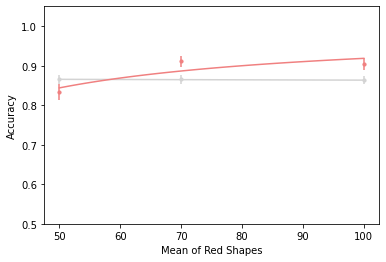

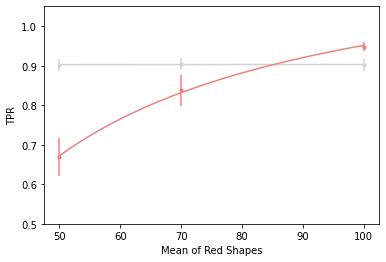

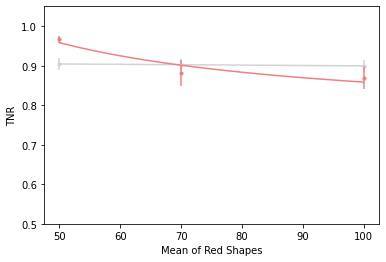

In [17]:
predictor = "mean_red"
predictor_label = "Mean of Red Shapes"
y_range = [0.5, 1.05]
line_x = np.linspace(50,100)

plot_results(predictor, predictor_label, line_x, y_range, rel_type = "reciproc")

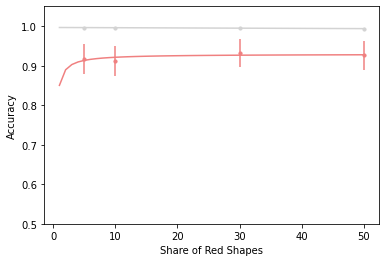

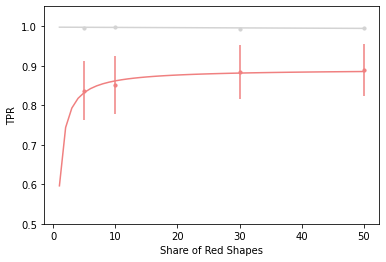

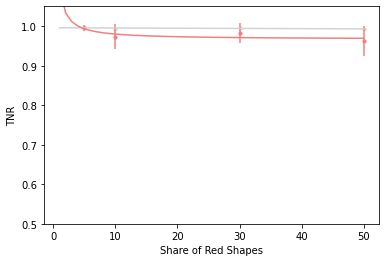

In [79]:
predictor = "minority_share"
predictor_label = "Share of Red Shapes"
y_range = [0.5, 1.05]
line_x = np.linspace(1,50)

plot_results(predictor, predictor_label, line_x, y_range, rel_type = "reciproc")

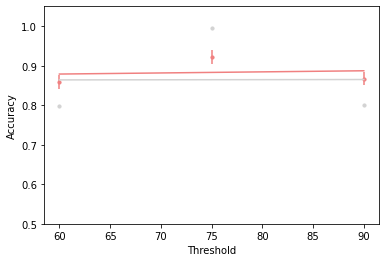

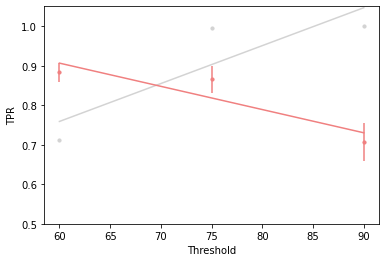

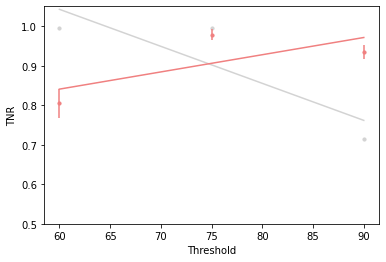

In [63]:
predictor = "threshold"
predictor_label = "Threshold"
y_range = [0.5, 1.05]
line_x = np.linspace(60,90)

plot_results(predictor, predictor_label, line_x, y_range, rel_type = "lin")

## Interactions

<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

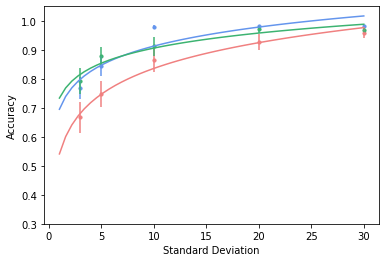

In [19]:
predictor = "stddev"
target = "accuracy"

# Set colors
colors = {
    50: "lightcoral", 
    70: "cornflowerblue", 
    80: "mediumseagreen", 
    90: "gold", 
    95: "plum", 
    100: "mediumseagreen"
}

# Create plotting area
fig = plt.plot(figsize=(10,3.75))
ax = plt.gca()

grouped = df_results.groupby(df_results.mean_red)
for mean_red in grouped.groups.keys():
    # Get data
    data = grouped.get_group(mean_red)
    
    # Plot means
    plot_means(data, predictor, target + "_r", colors[mean_red], ax, ci = True)

    # Curve fits
    line_x = np.linspace(1,30)
    plot_log_ols(data, predictor, target + "_r", colors[mean_red], ax, line_x, mean_red)

# Axis labels
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Accuracy')

# y-Axis range
ax.set_ylim([0.3, 1.05])

# Legend
#ax.legend()

# Save result
plt.savefig(figure_path + "stddev_mean_interaction_accuracy", dpi = 200, bbox_inches = 'tight')

<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

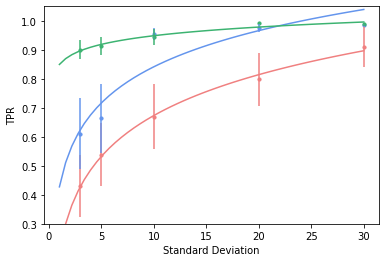

In [20]:
predictor = "stddev"
target = "tpr"

# Set colors
colors = {
    50: "lightcoral", 
    70: "cornflowerblue", 
    80: "mediumseagreen", 
    90: "bisque", 
    95: "plum", 
    100: "mediumseagreen"
}

# Create plotting area
fig = plt.plot(figsize=(10,3.75))
ax = plt.gca()

grouped = df_results.groupby(df_results.mean_red)
for mean_red in grouped.groups.keys():
    # Get data
    data = grouped.get_group(mean_red)
    
    # Plot means
    plot_means(data, predictor, target + "_r", colors[mean_red], ax, ci = True)

    # Curve fits
    line_x = np.linspace(1,30)
    plot_log_ols(data, predictor, target + "_r", colors[mean_red], ax, line_x, mean_red)

# Axis labels
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('TPR')

# y-Axis range
ax.set_ylim([0.3, 1.05])

# Legend
#ax.legend()

# Save result
plt.savefig(figure_path + "stddev_mean_interaction_tpr", dpi = 200, bbox_inches = 'tight')

<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

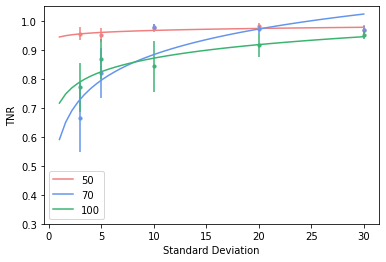

In [21]:
predictor = "stddev"
target = "tnr"

# Set colors
colors = {
    50: "lightcoral", 
    70: "cornflowerblue", 
    80: "mediumseagreen", 
    90: "bisque", 
    95: "plum", 
    100: "mediumseagreen"
}

# Create plotting area
fig = plt.plot(figsize=(10,3.75))
ax = plt.gca()

grouped = df_results.groupby(df_results.mean_red)
for mean_red in grouped.groups.keys():
    # Get data
    data = grouped.get_group(mean_red)
    
    # Plot means
    plot_means(data, predictor, target + "_r", colors[mean_red], ax, ci = True)

    # Curve fits
    line_x = np.linspace(1,30)
    plot_log_ols(data, predictor, target + "_r", colors[mean_red], ax, line_x, mean_red)

# Axis labels
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('TNR')

# y-Axis range
ax.set_ylim([0.3, 1.05])

# Legend
ax.legend()

# Save result
plt.savefig(figure_path + "stddev_mean_interaction_tnr", dpi = 200, bbox_inches = 'tight')

<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

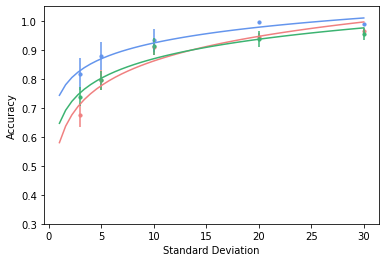

In [22]:
predictor = "stddev"
target = "accuracy"

# Set colors
colors = {
    60: "lightcoral", 
    75: "cornflowerblue", 
    90: "mediumseagreen"
}

# Create plotting area
fig = plt.plot(figsize=(10,3.75))
ax = plt.gca()

grouped = df_results.groupby(df_results.threshold)
for threshold in grouped.groups.keys():
    # Get data
    data = grouped.get_group(threshold)
    
    # Plot means
    plot_means(data, predictor, target + "_r", colors[threshold], ax, ci = True)

    # Curve fits
    line_x = np.linspace(1,30)
    plot_log_ols(data, predictor, target + "_r", colors[threshold], ax, line_x, threshold)

# Axis labels
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Accuracy')

# y-Axis range
ax.set_ylim([0.3, 1.05])

# Legend
#ax.legend()

# Save result
plt.savefig(figure_path + "stddev_threshold_interaction_accuracy", dpi = 200, bbox_inches = 'tight')

<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

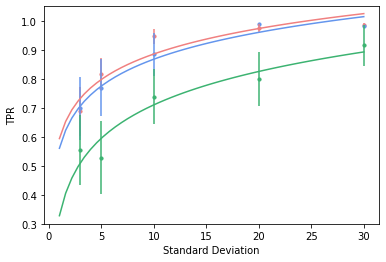

In [23]:
predictor = "stddev"
target = "tpr"

# Set colors
colors = {
    60: "lightcoral", 
    75: "cornflowerblue", 
    90: "mediumseagreen"
}

# Create plotting area
fig = plt.plot(figsize=(10,3.75))
ax = plt.gca()

grouped = df_results.groupby(df_results.threshold)
for threshold in grouped.groups.keys():
    # Get data
    data = grouped.get_group(threshold)
    
    # Plot means
    plot_means(data, predictor, target + "_r", colors[threshold], ax, ci = True)

    # Curve fits
    line_x = np.linspace(1,30)
    plot_log_ols(data, predictor, target + "_r", colors[threshold], ax, line_x, threshold)

# Axis labels
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('TPR')

# y-Axis range
ax.set_ylim([0.3, 1.05])

# Legend
#ax.legend()

# Save result
plt.savefig(figure_path + "stddev_threshold_interaction_tpr", dpi = 200, bbox_inches = 'tight')

<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_" + predictor] = np.log(df[predictor])
<ipython-input-14-3b144f503925>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

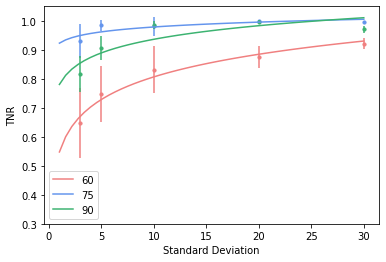

In [24]:
predictor = "stddev"
target = "tnr"

# Set colors
colors = {
    60: "lightcoral", 
    75: "cornflowerblue", 
    90: "mediumseagreen"
}

# Create plotting area
fig = plt.plot(figsize=(10,3.75))
ax = plt.gca()

grouped = df_results.groupby(df_results.threshold)
for threshold in grouped.groups.keys():
    # Get data
    data = grouped.get_group(threshold)
    
    # Plot means
    plot_means(data, predictor, target + "_r", colors[threshold], ax, ci = True)

    # Curve fits
    line_x = np.linspace(1,30)
    plot_log_ols(data, predictor, target + "_r", colors[threshold], ax, line_x, threshold)

# Axis labels
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('TNR')

# y-Axis range
ax.set_ylim([0.3, 1.05])

# Legend
ax.legend()

# Save result
plt.savefig(figure_path + "stddev_threshold_interaction_tnr", dpi = 200, bbox_inches = 'tight')

# Analysis - Experiment 4: Distractor + Model Size

In [88]:
# Load data
run_name = "classification_model_distractor"
run_date = "19-05-2021"
df = load_run_data(run_name, run_date, results_path)
df.head(5)

,Unnamed: 0,run,date,model,loss,category,m_diff,stddev,minority_share,repeat,threshold,noise,shape_color,shape_type,size,actual,prediction,group,prediction_diff,rmse
0,0,classification_model_distractor,2021-05-19 19:56:05.109,SmallCNN,bce,color,50,3,50,1,75,0,white,square,116,1,0.999998,over,-0.000002,0.000002
1,1,classification_model_distractor,2021-05-19 19:56:05.109,SmallCNN,bce,color,50,3,50,1,75,0,white,square,55,0,0.000025,over,0.000025,0.000025
2,2,classification_model_distractor,2021-05-19 19:56:05.109,SmallCNN,bce,color,50,3,50,1,75,0,white,square,46,0,0.000005,over,0.000005,0.000005
3,3,classification_model_distractor,2021-05-19 19:56:05.109,SmallCNN,bce,color,50,3,50,1,75,0,white,square,53,0,0.000016,over,0.000016,0.000016
4,4,classification_model_distractor,2021-05-19 19:56:05.109,SmallCNN,bce,color,50,3,50,1,75,0,white,square,99,1,0.999994,over,-0.000006,0.000006


In [106]:
# Pretty print model size and add custom ordering
conditions = [
    (df['model'] == "SimpleCNN"),
    (df['model'] == "SmallCNN"),
    (df['model'] == "MiniCNN")
]

values = ['large', 'base', 'small']

# Applying custom categorical order
labels = ['small','base','large']

df['model_size'] = pd.Categorical(np.select(conditions, values), categories = labels , ordered = True)
df['model_size_int'] = np.select(conditions, [3, 2, 1])

In [107]:
# Add column with binary prediction
df["prediction_bin"] = df["prediction"] >= 0.5

# Add columns for true positive, false positive, true negative, false negative
conditions = [
    (df['actual'] == 1) & (df['prediction_bin'] == 1),
    (df['actual'] == 0) & (df['prediction_bin'] == 1),
    (df['actual'] == 0) & (df['prediction_bin'] == 0),
    (df['actual'] == 1) & (df['prediction_bin'] == 0)
]

# Create a list of the values we want to assign for each condition
values = ['tp', 'fp', 'tn', 'fn']

# Create a new column and use np.select to assign values to it using our lists as arguments
df['result'] = np.select(conditions, values)


# Add other data to dataframe
df["mean_red"] = 100 - df["m_diff"]

# Split dataframe by groups for later analyses
df_over = df[df.group == "over"]
df_under = df[df.group == "under"]

df

,Unnamed: 0,run,date,model,loss,category,m_diff,stddev,minority_share,repeat,...,actual,prediction,group,prediction_diff,rmse,prediction_bin,result,mean_red,model_size,model_size_int
0,0,classification_model_distractor,2021-05-19 19:56:05.109,SmallCNN,bce,color,50,3,50,1,...,1,0.999998,over,-0.000002,0.000002,True,tp,50,base,2
1,1,classification_model_distractor,2021-05-19 19:56:05.109,SmallCNN,bce,color,50,3,50,1,...,0,0.000025,over,0.000025,0.000025,False,tn,50,base,2
2,2,classification_model_distractor,2021-05-19 19:56:05.109,SmallCNN,bce,color,50,3,50,1,...,0,0.000005,over,0.000005,0.000005,False,tn,50,base,2
3,3,classification_model_distractor,2021-05-19 19:56:05.109,SmallCNN,bce,color,50,3,50,1,...,0,0.000016,over,0.000016,0.000016,False,tn,50,base,2
4,4,classification_model_distractor,2021-05-19 19:56:05.109,SmallCNN,bce,color,50,3,50,1,...,1,0.999994,over,-0.000006,0.000006,True,tp,50,base,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,classification_model_distractor,2021-05-19 19:56:05.109,MiniCNN,bce,shape,50,3,50,5,...,0,0.000005,under,0.000005,0.000005,False,tn,50,small,1
14996,14996,classification_model_distractor,2021-05-19 19:56:05.109,MiniCNN,bce,shape,50,3,50,5,...,1,0.999954,under,-0.000046,0.000046,True,tp,50,small,1
14997,14997,classification_model_distractor,2021-05-19 19:56:05.109,MiniCNN,bce,shape,50,3,50,5,...,1,0.011133,under,-0.988867,0.988867,False,fn,50,small,1
14998,14998,classification_model_distractor,2021-05-19 19:56:05.109,MiniCNN,bce,shape,50,3,50,5,...,1,0.993757,under,-0.006243,0.006243,True,tp,50,small,1


In [102]:
results = []

# Group data
predictors = ["model_size", "category"]
grouped = df.groupby(predictors)

# Go through groups
for model_size, category in grouped.groups.keys():
    
    # Get data
    data = grouped.get_group((model_size, category))
    
    # Overall data
    total, accuracy, tpr, tnr = get_results(data)
    
    # White shapes
    total_w, accuracy_w, tpr_w, tnr_w = get_results(data[data.group == "over"])
    
    # Red shapes
    total_r, accuracy_r, tpr_r, tnr_r = get_results(data[data.group == "under"])
        
    # Store data
    results.append(
        {
            "model_size": model_size,
            "category": category,
            "total": total,
            "accuracy": accuracy,
            "tpr": tpr,
            "tnr": tnr,
            "accuracy_w": accuracy_w,
            "tpr_w": tpr_w,
            "tnr_w": tnr_w,
            "accuracy_r": accuracy_r,
            "tpr_r": tpr_r,
            "tnr_r": tnr_r,
            "accuracy_diff": accuracy_w - accuracy_r,
            "tpr_diff": tpr_w - tpr_r,
            "tnr_diff": tnr_w - tnr_r
        }
    )
    
# Make dataframe of results
df_results = pd.DataFrame(results)
df_results

,model_size,category,total,accuracy,tpr,tnr,accuracy_w,tpr_w,tnr_w,accuracy_r,tpr_r,tnr_r,accuracy_diff,tpr_diff,tnr_diff
0,base,color,2500,0.8580,0.715323,0.998413,0.9984,1.000000,0.996825,0.7176,0.430645,1.0,0.2808,0.569355,-0.003175
1,base,shape,2500,0.9588,0.918548,0.998413,0.9984,1.000000,0.996825,0.9192,0.837097,1.0,0.0792,0.162903,-0.003175
2,large,color,2500,0.8224,0.641935,1.000000,1.0000,1.000000,1.000000,0.6448,0.283871,1.0,0.3552,0.716129,0.000000
3,large,shape,2500,0.9456,0.890323,1.000000,0.9936,0.987097,1.000000,0.8976,0.793548,1.0,0.0960,0.193548,0.000000
4,small,color,2500,0.8044,0.605645,1.000000,0.9944,0.988710,1.000000,0.6144,0.222581,1.0,0.3800,0.766129,0.000000
5,small,shape,2500,0.9484,0.895968,1.000000,1.0000,1.000000,1.000000,0.8968,0.791935,1.0,0.1032,0.208065,0.000000


In [109]:
df_results['model_size'] = pd.Categorical(df_results['model_size'], categories = labels , ordered = True)

In [110]:
for index, row in df_results.sort_values(by = ["category", "model_size"]).iterrows():
    category = row["category"]
    model = row["model_size"]
    accuracy_w = round(row["accuracy_w"] * 100, 2)
    accuracy_r = round(row["accuracy_r"] * 100, 2)
    tpr_w = round(row["tpr_w"] * 100, 2)
    tpr_r = round(row["tpr_r"] * 100, 2)
    tnr_w = round(row["tnr_w"] * 100, 2)
    tnr_r = round(row["tnr_r"] * 100, 2)      
    row_text = "{} & {} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(category, model, accuracy_w, tpr_w, tnr_w, accuracy_r, tpr_r, tnr_r)
    print(row_text)
      

color & small & 99.44 & 98.87 & 100.00 & 61.44 & 22.26 & 100.00 \\
color & base & 99.84 & 100.00 & 99.68 & 71.76 & 43.06 & 100.00 \\
color & large & 100.00 & 100.00 & 100.00 & 64.48 & 28.39 & 100.00 \\
shape & small & 100.00 & 100.00 & 100.00 & 89.68 & 79.19 & 100.00 \\
shape & base & 99.84 & 100.00 & 99.68 & 91.92 & 83.71 & 100.00 \\
shape & large & 99.36 & 98.71 & 100.00 & 89.76 & 79.35 & 100.00 \\


c:\users\lucas\anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
c:\users\lucas\anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


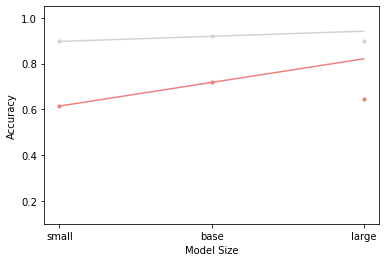

In [119]:
predictor = "model_size"
target = "accuracy"

# Set colors
colors = {
    "color": "lightcoral", 
    "shape": "lightgrey"
}

# Create plotting area
fig = plt.plot(figsize=(10,3.75))
ax = plt.gca()

grouped = df_results.groupby(df_results.category)
for category in grouped.groups.keys():
    # Get data
    data = grouped.get_group(category)
    
    # Plot means
    plot_means(data, predictor, target + "_r", colors[category], ax)

    # Curve fits
    line_x = np.linspace(0,2)
    plot_linear_ols(data, predictor, target + "_r", colors[category], ax, line_x, category)

# Axis labels
ax.set_xlabel('Model Size')
ax.set_ylabel('Accuracy')

# y-Axis range
ax.set_ylim([0.1, 1.05])

# Legend
#ax.legend()

# Save result
plt.savefig(figure_path + "distractor_model_interaction_accuracy", dpi = 200, bbox_inches = 'tight')

c:\users\lucas\anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
c:\users\lucas\anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


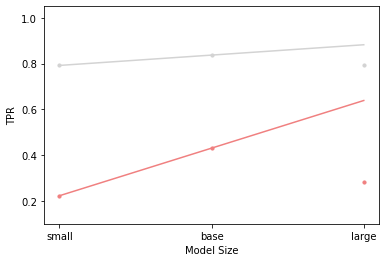

In [118]:
predictor = "model_size"
target = "tpr"

# Set colors
colors = {
    "color": "lightcoral", 
    "shape": "lightgrey"
}

# Create plotting area
fig = plt.plot(figsize=(10,3.75))
ax = plt.gca()

grouped = df_results.groupby(df_results.category)
for category in grouped.groups.keys():
    # Get data
    data = grouped.get_group(category)
    
    # Plot means
    plot_means(data, predictor, target + "_r", colors[category], ax)

    # Curve fits
    line_x = np.linspace(0,2)
    plot_linear_ols(data, predictor, target + "_r", colors[category], ax, line_x, category)

# Axis labels
ax.set_xlabel('Model Size')
ax.set_ylabel('TPR')

# y-Axis range
ax.set_ylim([0.1, 1.05])

# Legend
#ax.legend()

# Save result
plt.savefig(figure_path + "distractor_model_interaction_tpr", dpi = 200, bbox_inches = 'tight')

c:\users\lucas\anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
c:\users\lucas\anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


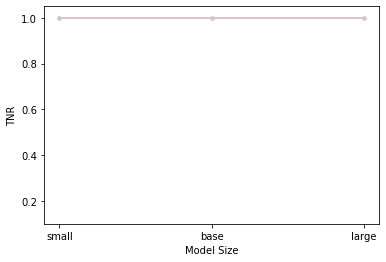

In [120]:
predictor = "model_size"
target = "tnr"

# Set colors
colors = {
    "color": "lightcoral", 
    "shape": "lightgrey"
}

# Create plotting area
fig = plt.plot(figsize=(10,3.75))
ax = plt.gca()

grouped = df_results.groupby(df_results.category)
for category in grouped.groups.keys():
    # Get data
    data = grouped.get_group(category)
    
    # Plot means
    plot_means(data, predictor, target + "_r", colors[category], ax)

    # Curve fits
    line_x = np.linspace(0,2)
    plot_linear_ols(data, predictor, target + "_r", colors[category], ax, line_x, category)

# Axis labels
ax.set_xlabel('Model Size')
ax.set_ylabel('TNR')

# y-Axis range
ax.set_ylim([0.1, 1.05])

# Legend
#ax.legend()

# Save result
plt.savefig(figure_path + "distractor_model_interaction_tnr", dpi = 200, bbox_inches = 'tight')